# CBC Featured Article Scraping

### Importing Libraries

In [28]:
# Web Scraping 
import requests
import urllib
from bs4 import BeautifulSoup

# Analysis
import nltk
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
import string
from matplotlib import pyplot

# Display 
from IPython.display import display, Markdown

# Functions Created
from get_urls import cbc_urls
from cbc_scraping import extract_info

### Extracting the URLs

First, we collect the urls that are in the featured stories. This includes primary featured stories and secondary featured stories. These urls will be used to extract further information from each article.

In [2]:
cbc_urls

['https://www.cbc.ca//news/canada/toronto/conrad-black-trump-pardon-1.5139524',
 'https://www.cbc.ca//news/canada/ottawa/nathalie-des-rosier-resigning-1.5139657',
 'https://www.cbc.ca//radio/checkup/i-wanted-to-pay-tribute-raptors-fan-immortalizes-kawhi-leonard-s-iconic-buzzer-beater-with-a-tattoo-1.5139483',
 'https://www.cbc.ca//news/canada/toronto/ontario-anti-carbon-tax-ad-backfires-1.5139384',
 'https://www.cbc.ca//news/canada/toronto/doug-ford-stem-cell-ontario-institute-regenerative-medicine-1.5137512',
 'https://www.cbc.ca//news/canada/toronto/toronto-man-becomes-1st-canadian-to-swim-across-world-s-highest-navigable-lake-1.5139494',
 'https://www.cbc.ca//news/canada/toronto/toronto-street-sweepers-still-have-lots-to-clean-1.5138989',
 'https://www.cbc.ca//news/canada/toronto/milton-teens-likely-ingested-opioid-1.5138632',
 'https://www.cbc.ca//news/canada/toronto/tory-raptors-jacket-1.5138557',
 'https://www.cbc.ca//news/canada/toronto/tick-prevention-toronto-public-health-1.51

From the list of articles, we are extracting the article headline, summary, author, date, and url. We will be collecting this data for the 16 CBC articles on the Feature page (information extracted on May 16, 2019). 

In [3]:
articles_info = []
for i in range(len(cbc_urls)):
    url = cbc_urls[i]
    info = extract_info(url)
    info['article_id']  = i 
    articles_info.append(info)

articles_info

[{'headline': "Conrad Black insists his relationship with Trump wasn't responsible for his criminal pardon",
  'summary': 'A criminal pardon U.S. President Donald Trump personally delivered to Conrad Black over the phone amounts to complete exoneration, the author and former media mogul said on Thursday.',
  'author': 'The Canadian Press',
  'date': 'Posted: May 16, 2019 7:24 PM ET | Last Updated: May 16',
  'url': 'https://www.cbc.ca//news/canada/toronto/conrad-black-trump-pardon-1.5139524',
  'article_id': 0},
 {'headline': 'Ottawa MPP Des Rosiers leaving seat for position at U of T',
  'summary': 'Nathalie Des Rosiers, the MPP for Ottawa-Vanier, will be stepping down from her seat to take a position with Massey College at the University of Toronto.',
  'author': 'CBC News',
  'date': 'Posted: May 16, 2019 8:50 PM ET | Last Updated: May 17',
  'url': 'https://www.cbc.ca//news/canada/ottawa/nathalie-des-rosier-resigning-1.5139657',
  'article_id': 1},
 {'headline': "'I wanted to pay t

### Cleaning up the Data

We are going to work with one article first then apply a similar technique to all of the remaining 15 articles. We'll start with the first article in the list of cbc_urls from the homepage.

In [30]:
article = articles_info[0]
article

{'headline': 'TDSB announces over 300 high school courses to be cut next year due to provincial changes',
 'summary': 'The Toronto District School Board says more than 300 classes are being cancelled over the coming school year and another 300 or so will continue on with larger class sizes as a result of provincial changes to class size averages. ',
 'author': 'CBC News',
 'date': 'Posted: May 17, 2019 5:47 PM ET | Last Updated: May 17',
 'url': 'https://www.cbc.ca//news/canada/toronto/tdsb-courses-cut-high-school-1.5141230',
 'article_id': 0}

In [31]:
# Removing the unicode text from the article summaries
cleaned_summary = article['summary'].replace('\xa0', '')
article['summary'] = cleaned_summary

In [32]:
# Simplifying the date string so it only has Month Day, Year Time
date = article['date']
start = len('Posted:' )
end = date.find('|')
cleaned_date = date[start:end].strip()

article['date'] = cleaned_date

In [33]:
article

{'headline': 'TDSB announces over 300 high school courses to be cut next year due to provincial changes',
 'summary': 'The Toronto District School Board says more than 300 classes are being cancelled over the coming school year and another 300 or so will continue on with larger class sizes as a result of provincial changes to class size averages. ',
 'author': 'CBC News',
 'date': 'May 17, 2019 5:47 PM ET',
 'url': 'https://www.cbc.ca//news/canada/toronto/tdsb-courses-cut-high-school-1.5141230',
 'article_id': 0}

### Loading the English NLP Model

In [34]:
#  Load the English NLP Model (for NER)
nlp = spacy.load('en_core_web_sm')

headline = article['headline']
doc = nlp(headline)

### Named Entity Recognition (NER)

We are going to use named entity recognition to see what companies, countries, people, etc. are mentioned in article summaries.

In [35]:
displacy.render(doc, style='ent', jupyter=True)

In [36]:
headline_ents = doc.ents
headline_ents

(over 300, next year)

In [37]:
# Organize by entity types - organizations, people, places, etc.
entities = {}

for i in range(len(doc.ents)):
    ent_type = doc.ents[i].label_
    if ent_type in entities:
        entities[type] += [doc.ents[i]]
    else:
        entities[type] = [doc.ents[i]]

entities

{type: [next year]}

In [38]:
# Finding the entity types for all of the 16 headlines

for i in range(len(articles_info)):
    headline = articles_info[i]['headline']
    doc = nlp(headline)
    for j in range(len(doc.ents)):
        ent_type = doc.ents[j].label_
        if ent_type == 'ORG':
            articles_info[i]['organizations'] = doc.ents[j]
        elif ent_type == 'PERSON':
            articles_info[i]['people'] = doc.ents[j]
            
articles_info

[{'headline': 'TDSB announces over 300 high school courses to be cut next year due to provincial changes',
  'summary': 'The Toronto District School Board says more than 300 classes are being cancelled over the coming school year and another 300 or so will continue on with larger class sizes as a result of provincial changes to class size averages. ',
  'author': 'CBC News',
  'date': 'May 17, 2019 5:47 PM ET',
  'url': 'https://www.cbc.ca//news/canada/toronto/tdsb-courses-cut-high-school-1.5141230',
  'article_id': 0},
 {'headline': 'Father and son arrested for allegedly possessing explosive substances, detonator released on bail',
  'summary': 'Reza Mohammadiasl, 47, and his son Mahyar, 18, were arrested on Monday and charged with one count each of possession of an explosive substance.',
  'author': 'CBC News',
  'date': 'Posted: May 17, 2019 2:13 PM ET | Last Updated: May 17',
  'url': 'https://www.cbc.ca//news/canada/toronto/father-son-released-bail-explosive-materials-richmond-hil

### Cleaning the Text 

In [39]:
# Converting headline to lowercase 
headline = articles_info[0]['headline'].lower() 

headline

'tdsb announces over 300 high school courses to be cut next year due to provincial changes'

### NLP Processing - Headlines

#### Sentence Splitting 
We begin by making sure the headline is one sentence and if not we split it using nltk. 

In [40]:
# Splitting the headline sentences
tokenized_sentences = nltk.tokenize.sent_tokenize(headline)
print(tokenized_sentences)

['tdsb announces over 300 high school courses to be cut next year due to provincial changes']


#### Tokenization
Next, we will be removing punctuation and tokenizing the words.

In [41]:
# Filter out anything that is not a word 
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

tokenized_headline = tokenizer.tokenize(headline)

print(tokenized_headline)

['tdsb', 'announces', 'over', '300', 'high', 'school', 'courses', 'to', 'be', 'cut', 'next', 'year', 'due', 'to', 'provincial', 'changes']


In [43]:
# Removing stop words from headlines 
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = set(stopwords.words('english'))

token_words = word_tokenize(headline)

new_headline = []
for word in token_words:
    if word not in stop_words:
        new_headline.append(word)
        
display(Markdown(f"**Original**: {token_words}"))
display(Markdown(f"**Cleaned**: {new_headline}"))        

**Original**: ['tdsb', 'announces', 'over', '300', 'high', 'school', 'courses', 'to', 'be', 'cut', 'next', 'year', 'due', 'to', 'provincial', 'changes']

**Cleaned**: ['tdsb', 'announces', '300', 'high', 'school', 'courses', 'cut', 'next', 'year', 'due', 'provincial', 'changes']

#### Lemmatization
We use lemmatization instead of stemming because we want to take into account the context and part of speech from the headline in order to determine the root form.

In [44]:
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()

for i in range(len(new_headline)):
    word = new_headline[i]
    new_headline[i] = lem.lemmatize(word)
    
new_headline

['tdsb',
 'announces',
 '300',
 'high',
 'school',
 'course',
 'cut',
 'next',
 'year',
 'due',
 'provincial',
 'change']

In [45]:
# Removing contraction leftovers: n't 
new_headline = list(filter(lambda x: x!="n't", new_headline))

sentence = ' '.join(new_headline)

display(Markdown(f"**Original Headline**: {articles_info[0]['headline']}"))
display(Markdown(f"**Cleaned Headline**: {sentence}"))
display(Markdown(f'---'))

**Original Headline**: TDSB announces over 300 high school courses to be cut next year due to provincial changes

**Cleaned Headline**: tdsb announces 300 high school course cut next year due provincial change

---

### Word Frequencies

In [46]:
d = {}
for i in range(len(new_headline)):
    word = new_headline[i]
    if word in d:
        d[word] += 1
    else:
        d[word] = 1

d

{'tdsb': 1,
 'announces': 1,
 '300': 1,
 'high': 1,
 'school': 1,
 'course': 1,
 'cut': 1,
 'next': 1,
 'year': 1,
 'due': 1,
 'provincial': 1,
 'change': 1}

### Graphing Frequencies

We will now graph the frequency of the words from the featured headlines on the CBC main home page.

In [47]:
index = list(range(len(d)))
index

df = pd.DataFrame.from_dict(d, orient='index')
df.columns = ['Frequency']

df

,Frequency
tdsb,1
announces,1
300,1
high,1
school,1
course,1
cut,1
next,1
year,1
due,1


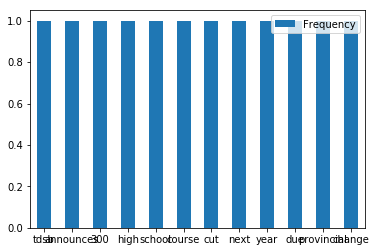

In [50]:
ax = df.plot.bar(rot=0)